In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.interpolate
import statsmodels.api as sm
import numpy.linalg as la

from sklearn.linear_model import LinearRegression
from linearmodels import PooledOLS
from linearmodels import PanelOLS
from scipy import stats
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess

In [33]:
# Create list of country names

#countrylist = set(df.index.get_level_values('Country'))
#print(r'There are ' + str(len(countrylist)) + ' Countries in the dataset')

countrylist = ['AE','AT','AU','BE','BR','CA','CZ','DE','DK','ES','FI','FR','HK','HU','IE','IT',
              'JP','KR','LU','MX','MY','NL','NO','NZ','PH','PL','PT','RU','SE','SG','TH','TR','TW','US','UK']

countrylistexus = ['AE','AT','AU','BE','BR','CA','CZ','DE','DK','ES','FI','FR','HK','HU','IE','IT',
              'JP','KR','LU','MX','MY','NL','NO','NZ','PH','PL','PT','RU','SE','SG','TH','TR','TW','UK']

len(countrylist)

35

In [34]:
df = pd.read_csv('hfdata3.csv', usecols = ['Date','Country','ipadpro12.9p','ipadprosmallp','ipadp','ipadmp','ER','vatgst','tariff','Week'],\
 index_col = ['Country','Date'],encoding='latin1')
df.index = df.index.set_levels([df.index.levels[0], pd.to_datetime(df.index.levels[1], dayfirst=True)])

In [35]:
df

ipadpro12.9p  ipadprosmallp   ipadp  ipadmp  vatgst  \
Country Date                                                              
AE      2016-01-01        3099.0            NaN  1499.0   999.0     0.0   
        2016-01-08        3099.0            NaN  1499.0   999.0     0.0   
        2016-01-15        3099.0            NaN  1499.0   999.0     0.0   
        2016-01-22        3099.0            NaN  1499.0   999.0     0.0   
        2016-01-29        3099.0            NaN  1499.0   999.0     0.0   
...                          ...            ...     ...     ...     ...   
UK      2021-12-03         999.0          749.0   319.0   479.0     0.2   
        2021-12-10         999.0          749.0   319.0   479.0     0.2   
        2021-12-17         999.0          749.0   319.0   479.0     0.2   
        2021-12-24         999.0          749.0   319.0   479.0     0.2   
        2021-12-31         999.0          749.0   319.0   479.0     0.2   

                    tariff      ER  Week  
Country Date                              
AE      2016-01-01     0.0  3.6730     1  
        2016-01-08     0.0  3.6730     2  
        2016-01-15     0.0  3.6730     3  
        2016-01-22     0.0  3.6730     4  
        2016-01-29     0.0  3.6730     5  
...                    ...     ...   ...  
UK      2021-12-03     0.0  0.7522   310  
        2021-12-10     0.0  0.7553   311  
        2021-12-17     0.0  0.7544   312  
        2021-12-24     0.0  0.7513   313  
        2021-12-31     0.0  0.7427   314  

[10990 rows x 8 columns]

In [36]:
df['ipadpro12.9pUSD'] = df['ipadpro12.9p'] / df['ER']

In [37]:
df

ipadpro12.9p  ipadprosmallp   ipadp  ipadmp  vatgst  \
Country Date                                                              
AE      2016-01-01        3099.0            NaN  1499.0   999.0     0.0   
        2016-01-08        3099.0            NaN  1499.0   999.0     0.0   
        2016-01-15        3099.0            NaN  1499.0   999.0     0.0   
        2016-01-22        3099.0            NaN  1499.0   999.0     0.0   
        2016-01-29        3099.0            NaN  1499.0   999.0     0.0   
...                          ...            ...     ...     ...     ...   
UK      2021-12-03         999.0          749.0   319.0   479.0     0.2   
        2021-12-10         999.0          749.0   319.0   479.0     0.2   
        2021-12-17         999.0          749.0   319.0   479.0     0.2   
        2021-12-24         999.0          749.0   319.0   479.0     0.2   
        2021-12-31         999.0          749.0   319.0   479.0     0.2   

                    tariff      ER  Week  ipadpro12.9pUSD  
Country Date                                               
AE      2016-01-01     0.0  3.6730     1       843.724476  
        2016-01-08     0.0  3.6730     2       843.724476  
        2016-01-15     0.0  3.6730     3       843.724476  
        2016-01-22     0.0  3.6730     4       843.724476  
        2016-01-29     0.0  3.6730     5       843.724476  
...                    ...     ...   ...              ...  
UK      2021-12-03     0.0  0.7522   310      1328.104228  
        2021-12-10     0.0  0.7553   311      1322.653250  
        2021-12-17     0.0  0.7544   312      1324.231177  
        2021-12-24     0.0  0.7513   313      1329.695195  
        2021-12-31     0.0  0.7427   314      1345.092231  

[10990 rows x 9 columns]

In [38]:
dfbases = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)
# Select 1 All Bases or 2 US Base

select = 2

if select == 1:
    for c in countrylist:
        print(c)  
        dfbases['lnipadpro12.9pratio'+c] = np.log(df['ipadpro12.9p'] / df.loc[c]['ipadpro12.9p']) 
        dfbases['lnipadprosmallp'+c] = np.log(df['ipadprosmallp'] / df.loc[c]['ipadprosmallp']) 
        dfbases['lnipadp'+c] = np.log(df['ipadp'] / df.loc[c]['ipadp']) 
        dfbases['lnipadmp'+c] = np.log(df['ipadmp'] / df.loc[c]['ipadmp'])
        dfbases['e'+c] = np.log(df['ER'] / df.loc[c]['ER'])
        dfbases['lnvatgstratio'+c] = np.log((1 + df['vatgst']) / (1 + df.loc[c]['vatgst']))
        dfbases['lntariffratio'+c] = np.log((1 + df['tariff']) / (1 + df.loc[c]['tariff']))
elif select == 2:
    c = 'US'
    dfbases['lnipadpro12.9pratio'+c] = np.log(df['ipadpro12.9p'] / df.loc[c]['ipadpro12.9p']) 
    dfbases['lnipadprosmallp'+c] = np.log(df['ipadprosmallp'] / df.loc[c]['ipadprosmallp']) 
    dfbases['lnipadp'+c] = np.log(df['ipadp'] / df.loc[c]['ipadp']) 
    dfbases['lnipadmp'+c] = np.log(df['ipadmp'] / df.loc[c]['ipadmp'])
    dfbases['e'+c] = np.log(df['ER'] / df.loc[c]['ER'])
    dfbases['lnvatgstratio'+c] = np.log((1 + df['vatgst']) / (1 + df.loc[c]['vatgst']))
    dfbases['lntariffratio'+c] = np.log((1 + df['tariff']) / (1 + df.loc[c]['tariff']))
    
    dfbases['ipadpro12.9pUSD'+c] = df['ipadpro12.9p'] / df['ER']
    dfbases['ipadprosmallpUSD'+c] = df['ipadprosmallp'] / df['ER']
    dfbases['ipadpUSD'+c] = df['ipadp'] / df['ER']
    dfbases['ipadmpUSD'+c] = df['ipadmp'] / df['ER']

In [39]:
dfbases

lnipadpro12.9pratioUS  lnipadprosmallpUS  lnipadpUS  \
Country Date                                                              
AE      2016-01-01               1.355474                NaN   1.323592   
        2016-01-08               1.355474                NaN   1.323592   
        2016-01-15               1.355474                NaN   1.323592   
        2016-01-22               1.355474                NaN   1.323592   
        2016-01-29               1.355474                NaN   1.323592   
...                                   ...                ...        ...   
UK      2021-12-03              -0.095401          -0.064622  -0.030867   
        2021-12-10              -0.095401          -0.064622  -0.030867   
        2021-12-17              -0.095401          -0.064622  -0.030867   
        2021-12-24              -0.095401          -0.064622  -0.030867   
        2021-12-31              -0.095401          -0.064622  -0.030867   

                    lnipadmpUS       eUS  lnvatgstratioUS  lntariffratioUS  \
Country Date                                                                 
AE      2016-01-01    1.312043  1.301009        -0.049742              0.0   
        2016-01-08    1.312043  1.301009        -0.049742              0.0   
        2016-01-15    1.312043  1.301009        -0.049742              0.0   
        2016-01-22    1.312043  1.301009        -0.049742              0.0   
        2016-01-29    1.312043  1.301009        -0.049742              0.0   
...                        ...       ...              ...              ...   
UK      2021-12-03   -0.040905 -0.284753         0.132579              0.0   
        2021-12-10   -0.040905 -0.280640         0.132579              0.0   
        2021-12-17   -0.040905 -0.281833         0.132579              0.0   
        2021-12-24   -0.040905 -0.285950         0.132579              0.0   
        2021-12-31   -0.040905 -0.297463         0.132579              0.0   

                    ipadpro12.9pUSDUS  ipadprosmallpUSDUS  ipadpUSDUS  \
Country Date                                                            
AE      2016-01-01         843.724476                 NaN  408.113259   
        2016-01-08         843.724476                 NaN  408.113259   
        2016-01-15         843.724476                 NaN  408.113259   
        2016-01-22         843.724476                 NaN  408.113259   
        2016-01-29         843.724476                 NaN  408.113259   
...                               ...                 ...         ...   
UK      2021-12-03        1328.104228          995.745812  424.089338   
        2021-12-10        1322.653250          991.658943  422.348736   
        2021-12-17        1324.231177          992.841994  422.852598   
        2021-12-24        1329.695195          996.938640  424.597365   
        2021-12-31        1345.092231         1008.482564  429.513936   

                    ipadmpUSDUS  
Country Date                     
AE      2016-01-01   271.984754  
        2016-01-08   271.984754  
        2016-01-15   271.984754  
        2016-01-22   271.984754  
        2016-01-29   271.984754  
...                         ...  
UK      2021-12-03   636.798724  
        2021-12-10   634.185092  
        2021-12-17   634.941676  
        2021-12-24   637.561560  
        2021-12-31   644.944123  

[10990 rows x 11 columns]

In [40]:
if select == 1:
    for c in countrylist:
        print(c)  
        dfbases['qpl'+c] = dfbases['lnipadpro12.9pratio'+c] - dfbases['e'+c]
        dfbases['qps'+c] = dfbases['lnipadprosmallp'+c] - dfbases['e'+c]
        dfbases['qip'+c] = dfbases['lnipadp'+c] - dfbases['e'+c]
        dfbases['qim'+c] = dfbases['lnipadmp'+c] - dfbases['e'+c]
elif select == 2:
    c = 'US'
    dfbases['qpl'+c] = dfbases['lnipadpro12.9pratio'+c] - dfbases['e'+c]
    dfbases['qps'+c] = dfbases['lnipadprosmallp'+c] - dfbases['e'+c]
    dfbases['qip'+c] = dfbases['lnipadp'+c] - dfbases['e'+c]
    dfbases['qim'+c] = dfbases['lnipadmp'+c] - dfbases['e'+c]

In [41]:
dfbases['qplUSadj'] = dfbases['qplUS']
dfbases['qpsUSadj'] = dfbases['qpsUS']
dfbases['qipUSadj'] = dfbases['qipUS']
dfbases['qimUSadj'] = dfbases['qimUS']

for c in countrylist:
    print(c)  
    dfbases['qplUSadj'][c] = dfbases['qplUSadj'][c] - np.average(dfbases['qplUS'][c])
    dfbases['qpsUSadj'][c] = dfbases['qpsUSadj'][c] - np.average(dfbases['qpsUS'][c].dropna())
    dfbases['qipUSadj'][c] = dfbases['qipUSadj'][c] - np.average(dfbases['qipUS'][c])
    dfbases['qimUSadj'][c] = dfbases['qimUSadj'][c] - np.average(dfbases['qimUS'][c])

AE
AT
AU
BE
BR
CA
CZ
DE
DK
ES
FI
FR
HK
HU
IE
IT
JP
KR
LU
MX
MY
NL
NO
NZ
PH
PL
PT
RU
SE
SG
TH
TR
TW
US
UK


In [42]:
dfbasesboxplot = dfbases.reset_index().sort_values('Country')
dfbasesboxplot

,Country,Date,lnipadpro12.9pratioUS,lnipadprosmallpUS,lnipadpUS,lnipadmpUS,eUS,lnvatgstratioUS,lntariffratioUS,ipadpro12.9pUSDUS,...,ipadpUSDUS,ipadmpUSDUS,qplUS,qpsUS,qipUS,qimUS,qplUSadj,qpsUSadj,qipUSadj,qimUSadj
0,AE,2016-01-01,1.355474,NaN,1.323592,1.312043,1.301009,-0.049742,0.0,843.724476,...,408.113259,271.984754,0.054465,NaN,0.022583,0.011035,-0.011673,NaN,-0.066993,-0.073605
213,AE,2020-01-31,1.387045,1.387233,1.411061,1.388172,1.301009,-0.000952,0.0,1088.755785,...,367.274707,435.338960,0.086036,0.086224,0.110052,0.087164,0.019898,0.011292,0.020476,0.002524
212,AE,2020-01-24,1.387045,1.387233,1.411061,1.388172,1.301009,-0.000952,0.0,1088.755785,...,367.274707,435.338960,0.086036,0.086224,0.110052,0.087164,0.019898,0.011292,0.020476,0.002524
211,AE,2020-01-17,1.387045,1.387233,1.411061,1.388172,1.300982,-0.000952,0.0,1088.785428,...,367.284707,435.350813,0.086063,0.086251,0.110080,0.087191,0.019925,0.011319,0.020503,0.002551
210,AE,2020-01-10,1.387045,1.387233,1.411061,1.388172,1.301009,-0.000952,0.0,1088.755785,...,367.274707,435.338960,0.086036,0.086224,0.110052,0.087164,0.019898,0.011292,0.020476,0.002524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,US,2017-12-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,799.000000,...,329.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1671,US,2017-12-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,799.000000,...,329.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1670,US,2017-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,799.000000,...,329.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1677,US,2018-01-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,799.000000,...,329.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
np.average(dfbasesboxplot['qplUS'])

0.2004485485618477

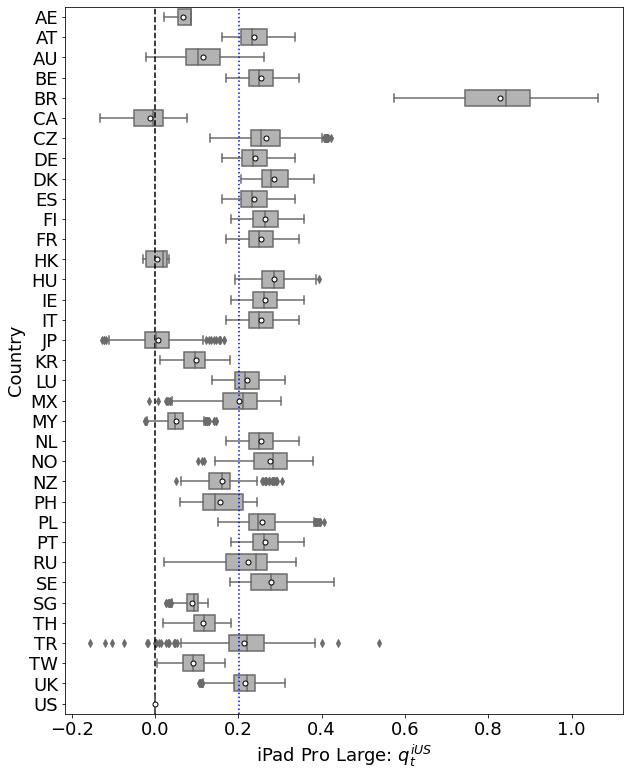

In [44]:
product = 'qplUS'

plt.figure(figsize=(10,13))

sns.boxplot(data=dfbasesboxplot, x=product, y='Country', showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"5"}, color=".7")
plt.xlabel(r'iPad Pro Large: $q_{t}^{iUS}$',size=18)
plt.ylabel('Country',size=18)
plt.tick_params(labelsize=18)
plt.axvline(x = np.average(dfbasesboxplot[product]), color = 'b', linestyle='dotted', label = 'Average')
plt.axvline(x = 0, color='black', linestyle='dashed', label = 'Zero')
plt.savefig('figboxplotqprol',transparent=True, bbox_inches='tight')

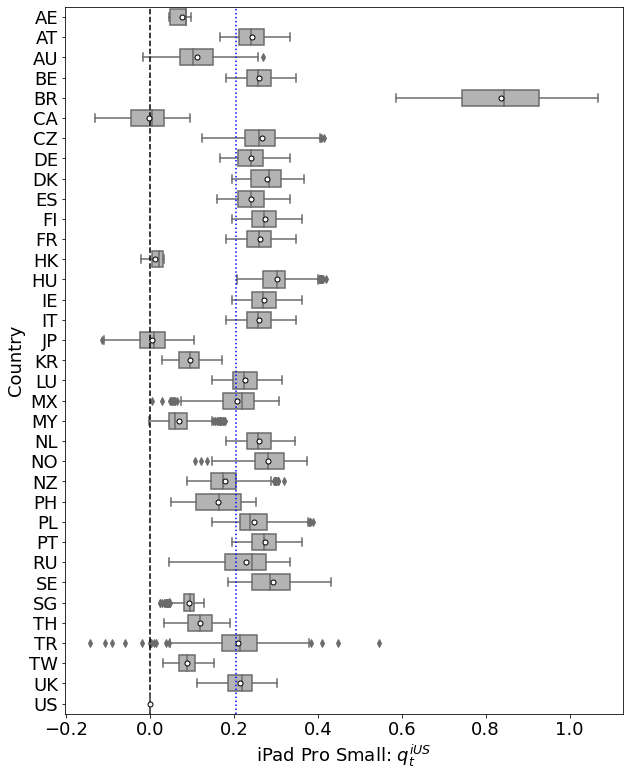

In [45]:
product = 'qpsUS'

plt.figure(figsize=(10,13))

sns.boxplot(data=dfbasesboxplot, x=product, y='Country', showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"5"}, color=".7")
plt.xlabel(r'iPad Pro Small: $q_{t}^{iUS}$',size=18)
plt.ylabel('Country',size=18)
plt.tick_params(labelsize=18)
plt.axvline(x = np.average(dfbasesboxplot[product].dropna()), color = 'b', linestyle='dotted', label = 'Average')
plt.axvline(x = 0, color='black', linestyle='dashed', label = 'Zero')
plt.savefig('figboxplotqpros',transparent=True, bbox_inches='tight')

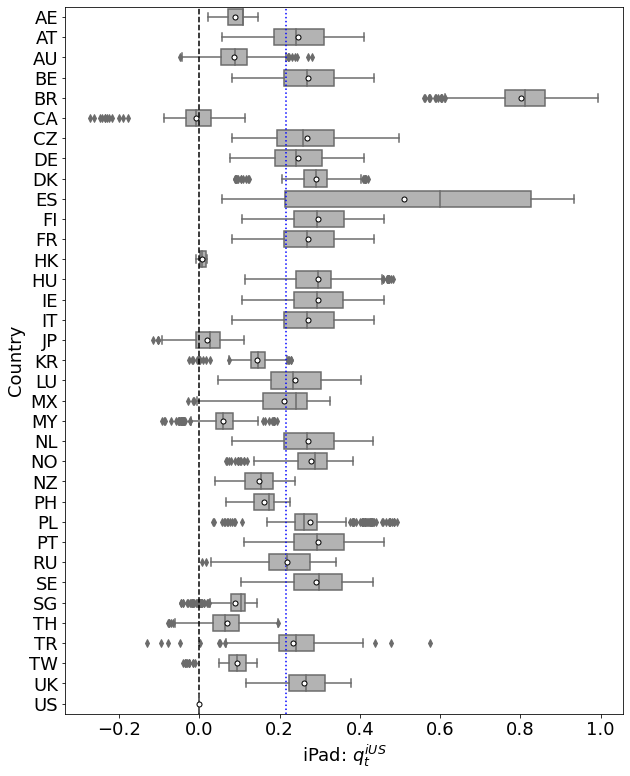

In [46]:
product = 'qipUS'

plt.figure(figsize=(10,13))

sns.boxplot(data=dfbasesboxplot, x=product, y='Country', showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"5"}, color=".7")
plt.xlabel(r'iPad: $q_{t}^{iUS}$',size=18)
plt.ylabel('Country',size=18)
plt.tick_params(labelsize=18)
plt.axvline(x = np.average(dfbasesboxplot[product].dropna()), color = 'b', linestyle='dotted', label = 'Average')
plt.axvline(x = 0, color='black', linestyle='dashed', label = 'Zero')
plt.savefig('figboxplotqip',transparent=True, bbox_inches='tight')

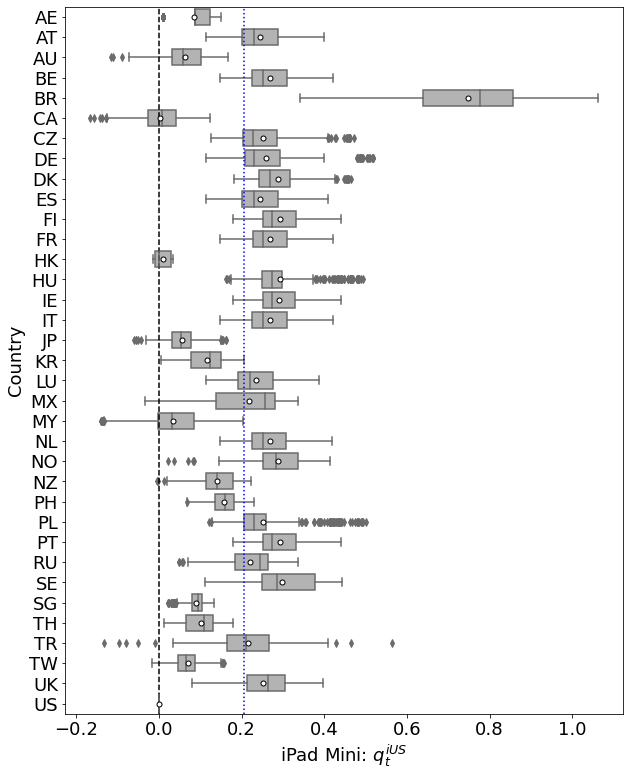

In [47]:
product = 'qimUS'

plt.figure(figsize=(10,13))

sns.boxplot(data=dfbasesboxplot, x=product, y='Country', showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"5"}, color=".7")
plt.xlabel(r'iPad Mini: $q_{t}^{iUS}$',size=18)
plt.ylabel('Country',size=18)
plt.tick_params(labelsize=18)
plt.axvline(x = np.average(dfbasesboxplot[product].dropna()), color = 'b', linestyle='dotted', label = 'Average')
plt.axvline(x = 0, color='black', linestyle='dashed', label = 'Zero')
plt.savefig('figboxplotqim',transparent=True, bbox_inches='tight')

In [48]:
dfbasesboxplot

,Country,Date,lnipadpro12.9pratioUS,lnipadprosmallpUS,lnipadpUS,lnipadmpUS,eUS,lnvatgstratioUS,lntariffratioUS,ipadpro12.9pUSDUS,...,ipadpUSDUS,ipadmpUSDUS,qplUS,qpsUS,qipUS,qimUS,qplUSadj,qpsUSadj,qipUSadj,qimUSadj
0,AE,2016-01-01,1.355474,NaN,1.323592,1.312043,1.301009,-0.049742,0.0,843.724476,...,408.113259,271.984754,0.054465,NaN,0.022583,0.011035,-0.011673,NaN,-0.066993,-0.073605
213,AE,2020-01-31,1.387045,1.387233,1.411061,1.388172,1.301009,-0.000952,0.0,1088.755785,...,367.274707,435.338960,0.086036,0.086224,0.110052,0.087164,0.019898,0.011292,0.020476,0.002524
212,AE,2020-01-24,1.387045,1.387233,1.411061,1.388172,1.301009,-0.000952,0.0,1088.755785,...,367.274707,435.338960,0.086036,0.086224,0.110052,0.087164,0.019898,0.011292,0.020476,0.002524
211,AE,2020-01-17,1.387045,1.387233,1.411061,1.388172,1.300982,-0.000952,0.0,1088.785428,...,367.284707,435.350813,0.086063,0.086251,0.110080,0.087191,0.019925,0.011319,0.020503,0.002551
210,AE,2020-01-10,1.387045,1.387233,1.411061,1.388172,1.301009,-0.000952,0.0,1088.755785,...,367.274707,435.338960,0.086036,0.086224,0.110052,0.087164,0.019898,0.011292,0.020476,0.002524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,US,2017-12-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,799.000000,...,329.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1671,US,2017-12-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,799.000000,...,329.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1670,US,2017-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,799.000000,...,329.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1677,US,2018-01-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,799.000000,...,329.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


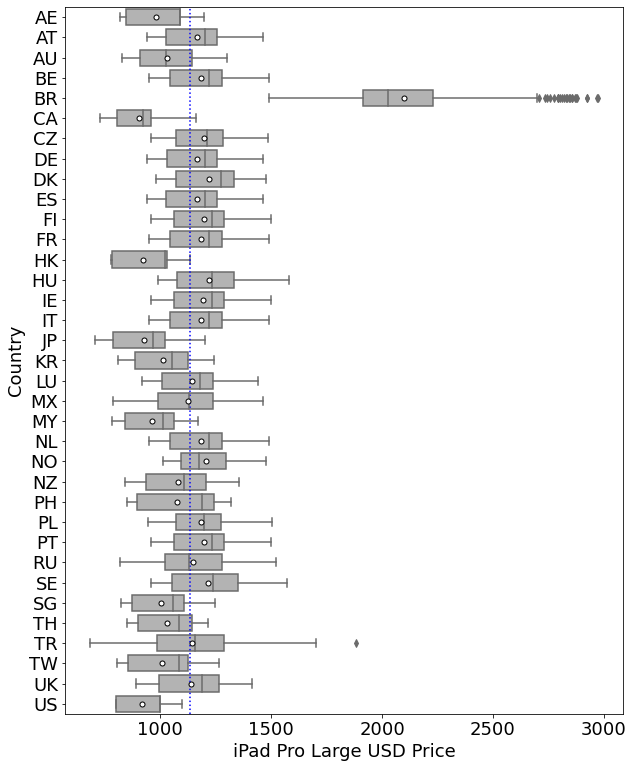

In [52]:
product = 'ipadpro12.9pUSDUS'

plt.figure(figsize=(10,13))

sns.boxplot(data=dfbasesboxplot, x=product, y='Country', showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"5"}, color=".7")
plt.xlabel(r'iPad Pro Large USD Price',size=18)
plt.ylabel('Country',size=18)
plt.tick_params(labelsize=18)
plt.axvline(x = np.average(dfbasesboxplot[product]), color = 'b', linestyle='dotted', label = 'Average')
plt.savefig('figboxplotUSDhfipadprol',transparent=True, bbox_inches='tight')

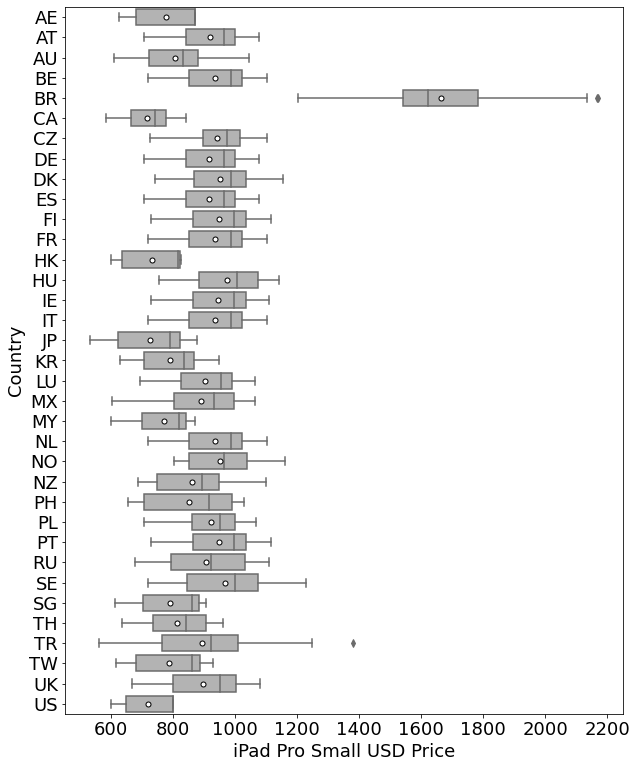

In [53]:
product = 'ipadprosmallpUSDUS'

plt.figure(figsize=(10,13))

sns.boxplot(data=dfbasesboxplot, x=product, y='Country', showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"5"}, color=".7")
plt.xlabel(r'iPad Pro Small USD Price',size=18)
plt.ylabel('Country',size=18)
plt.tick_params(labelsize=18)
plt.axvline(x = np.average(dfbasesboxplot[product]), color = 'b', linestyle='dotted', label = 'Average')
plt.savefig('figboxplotUSDhfipadpros',transparent=True, bbox_inches='tight')

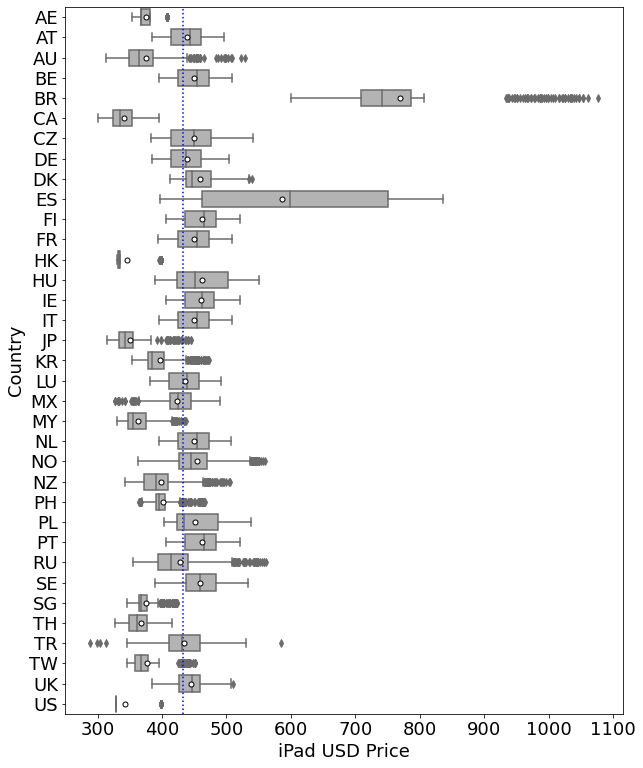

In [55]:
product = 'ipadpUSDUS'

plt.figure(figsize=(10,13))

sns.boxplot(data=dfbasesboxplot, x=product, y='Country', showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"5"}, color=".7")
plt.xlabel(r'iPad USD Price',size=18)
plt.ylabel('Country',size=18)
plt.tick_params(labelsize=18)
plt.axvline(x = np.average(dfbasesboxplot[product]), color = 'b', linestyle='dotted', label = 'Average')
plt.savefig('figboxplotUSDhfipad',transparent=True, bbox_inches='tight')

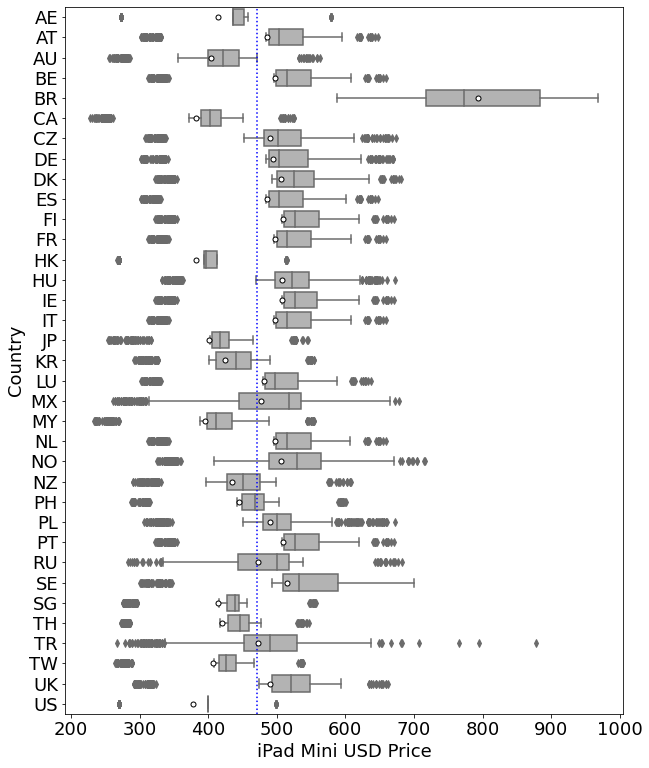

In [57]:
product = 'ipadmpUSDUS'

plt.figure(figsize=(10,13))

sns.boxplot(data=dfbasesboxplot, x=product, y='Country', showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"5"}, color=".7")
plt.xlabel(r'iPad Mini USD Price',size=18)
plt.ylabel('Country',size=18)
plt.tick_params(labelsize=18)
plt.axvline(x = np.average(dfbasesboxplot[product]), color = 'b', linestyle='dotted', label = 'Average')
plt.savefig('figboxplotUSDhfipadm',transparent=True, bbox_inches='tight')

In [14]:
count = 0
for c in countrylistexus:
    print(c)  
    print('Average: '+str(np.average(dfbases['qplUS'][c])))
    print('Std Dev: '+str(np.std(dfbases['qplUS'][c])))
    t = np.average(dfbases['qplUS'][c]) / np.std(dfbases['qplUS'][c])
    print(t)
    if np.abs(t) > 1.96:
        count = count+ 1
print(count)
print(len(countrylistexus))

AE
Average: 0.06613814922255405
Std Dev: 0.02572169858756127
2.571297886778664
AT
Average: 0.23847029027433694
Std Dev: 0.03996505124391168
5.966970711958384
AU
Average: 0.11431868892193056
Std Dev: 0.05537985859613087
2.064264731255877
BE
Average: 0.2541381386954711
Std Dev: 0.03905004106694157
6.508012072504982
BR
Average: 0.826942047219256
Std Dev: 0.10077828241282215
8.20555805696132
CA
Average: -0.012182766718352856
Std Dev: 0.04078252484687451
-0.29872517123682985
CZ
Average: 0.26737490846506606
Std Dev: 0.05845489684953726
4.57403781163601
DE
Average: 0.23936871050056827
Std Dev: 0.03981327069429707
6.012284505298277
DK
Average: 0.2849412133352846
Std Dev: 0.0403225856658051
7.066541210846116
ES
Average: 0.23839208570987322
Std Dev: 0.040109232389967366
5.943571380077144
FI
Average: 0.2651267873224021
Std Dev: 0.039228924143981415
6.758451655449704
FR
Average: 0.2541305680610596
Std Dev: 0.03904731363807088
6.508272769199772
HK
Average: 0.003764470955482509
Std Dev: 0.0255126130

In [15]:
count = 0
for c in countrylistexus:
    print(c)  
    print('Average: '+str(np.average(dfbases['qpsUS'][c].dropna())))
    print('Std Dev: '+str(np.std(dfbases['qpsUS'][c].dropna())))
    t = np.average(dfbases['qpsUS'][c].dropna()) / np.std(dfbases['qpsUS'][c].dropna())
    print(t)
    if np.abs(t) > 1.96:
        count = count+ 1
print(count)
print(len(countrylistexus))

AE
Average: 0.07493169762571714
Std Dev: 0.02023994385981071
3.702169242401146
AT
Average: 0.24170575486766813
Std Dev: 0.03919429242813849
6.166861037505093
AU
Average: 0.11209348364784458
Std Dev: 0.05649813779670955
1.9840208548320135
BE
Average: 0.260196715962853
Std Dev: 0.03816665767780551
6.817382809869708
BR
Average: 0.8365766311526599
Std Dev: 0.10679528655005455
7.833460241342764
CA
Average: -0.0030943011153381685
Std Dev: 0.04505232063416061
-0.06868239131264497
CZ
Average: 0.2672022089961977
Std Dev: 0.058127668253509186
4.596816232690816
DE
Average: 0.2404466102137722
Std Dev: 0.039129813931102944
6.144844200821754
DK
Average: 0.278598136620847
Std Dev: 0.044563622222861296
6.251694155999849
ES
Average: 0.24112004582900973
Std Dev: 0.0398876410209578
6.044981344028849
FI
Average: 0.2725321337296754
Std Dev: 0.0382317157929689
7.128430625648146
FR
Average: 0.26087608515391214
Std Dev: 0.03815773565381404
6.836781079483063
HK
Average: 0.012528409466557668
Std Dev: 0.01932183

In [16]:
count = 0
for c in countrylistexus:
    print(c)  
    print('Average: '+str(np.average(dfbases['qipUS'][c].dropna())))
    print('Std Dev: '+str(np.std(dfbases['qipUS'][c].dropna())))
    t = np.average(dfbases['qipUS'][c].dropna()) / np.std(dfbases['qipUS'][c].dropna())
    print(t)
    if np.abs(t) > 1.96:
        count = count+ 1
print(count)
print(len(countrylistexus))

AE
Average: 0.0895764090898733
Std Dev: 0.03738978885675319
2.3957452510110757
AT
Average: 0.2460053741162001
Std Dev: 0.07874067239766333
3.124247820412319
AU
Average: 0.0875297478965864
Std Dev: 0.055877866058502534
1.5664475770235256
BE
Average: 0.2712550308758878
Std Dev: 0.07910466482261169
3.4290649165148963
BR
Average: 0.801896736841046
Std Dev: 0.08799482719945668
9.112998597331153
CA
Average: -0.007508078428428556
Std Dev: 0.06193527494042576
-0.12122459189291433
CZ
Average: 0.2687402589489049
Std Dev: 0.09245720354049981
2.906644897941201
DE
Average: 0.2465459948918228
Std Dev: 0.07542794616213848
3.268629300363717
DK
Average: 0.28971660938197
Std Dev: 0.05734519294351255
5.052151619183725
ES
Average: 0.5087226769892046
Std Dev: 0.2812786162768107
1.8086077204267905
FI
Average: 0.2966946878219735
Std Dev: 0.07896176337100151
3.75744759432429
FR
Average: 0.2712549257820343
Std Dev: 0.0791655510330708
3.4264262958104044
HK
Average: 0.007738694576959773
Std Dev: 0.00783428438263

In [17]:
count = 0
for c in countrylistexus:
    print(c)  
    print('Average: '+str(np.average(dfbases['qimUS'][c].dropna())))
    print('Std Dev: '+str(np.std(dfbases['qimUS'][c].dropna())))
    t = np.average(dfbases['qimUS'][c].dropna()) / np.std(dfbases['qimUS'][c].dropna())
    print(t)
    if np.abs(t) > 1.96:
        count = count+ 1
print(count)
print(len(countrylistexus))

AE
Average: 0.08463987267160986
Std Dev: 0.043042364637002194
1.9664317559088649
AT
Average: 0.24474808387704444
Std Dev: 0.06246825464302196
3.917959374336131
AU
Average: 0.06402639574600169
Std Dev: 0.052022661117298453
1.2307404959857347
BE
Average: 0.26845887061224366
Std Dev: 0.05964169141847995
4.501194788869817
BR
Average: 0.7485059804025218
Std Dev: 0.16942957825688945
4.417799938495011
CA
Average: 0.0036759281352367946
Std Dev: 0.056007450331423445
0.06563284194307244
CZ
Average: 0.25142076326819784
Std Dev: 0.07543551252135446
3.332923113593549
DE
Average: 0.25919269165556075
Std Dev: 0.0864195613215898
2.9992363730132454
DK
Average: 0.2874617541925475
Std Dev: 0.06356195023441003
4.5225445904730375
ES
Average: 0.24511387696024692
Std Dev: 0.06456551832827734
3.7963588507721466
FI
Average: 0.2920658430033916
Std Dev: 0.05677962258576796
5.143849671811646
FR
Average: 0.268738648427925
Std Dev: 0.059446597646283975
4.520673328134936
HK
Average: 0.010149762550707498
Std Dev: 0.0

In [18]:
dfbases['qplUSadjabs'] = np.absolute(dfbases['qplUSadj'])
dfbases['qpsUSadjabs'] = np.absolute(dfbases['qpsUSadj'].dropna())
dfbases['qipUSadjabs'] = np.absolute(dfbases['qipUSadj'])
dfbases['qimUSadjabs'] = np.absolute(dfbases['qimUSadj'])

<AxesSubplot:>

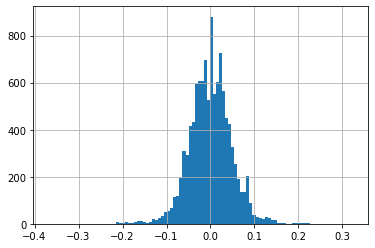

In [19]:
dfbases['qplUSadj'].hist(bins=100)

<AxesSubplot:>

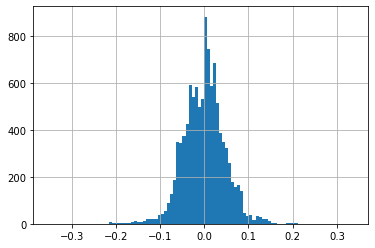

In [20]:
dfbases['qpsUSadj'].hist(bins=100)

<AxesSubplot:>

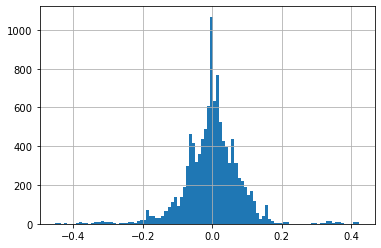

In [21]:
dfbases['qipUSadj'].hist(bins=100)

<AxesSubplot:>

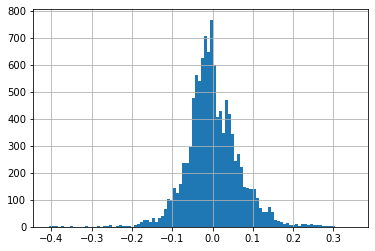

In [22]:
dfbases['qimUSadj'].hist(bins=100)

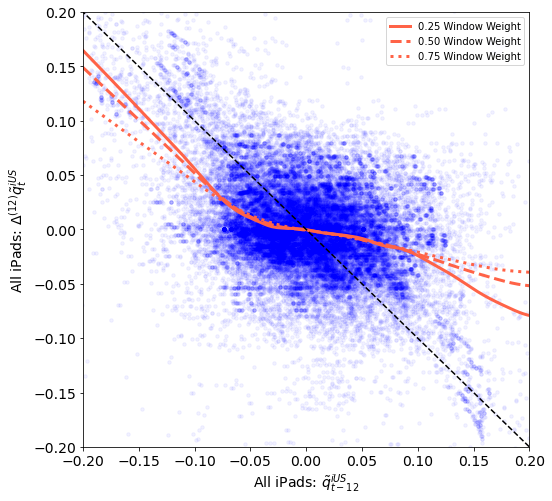

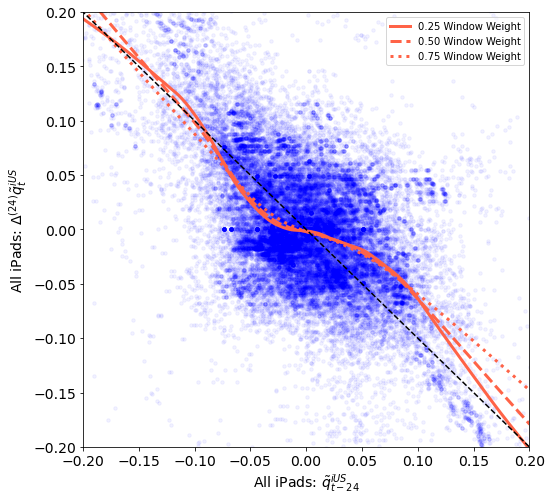

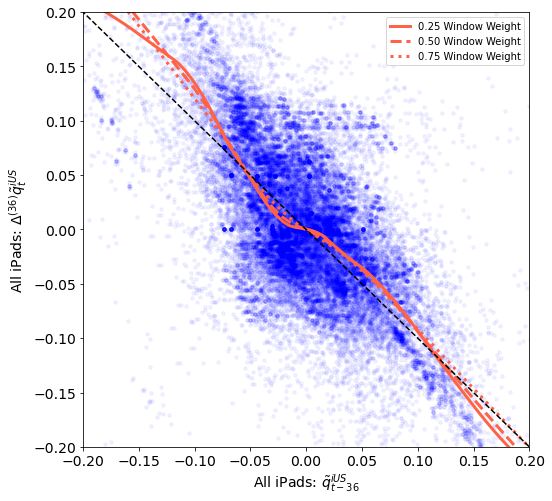

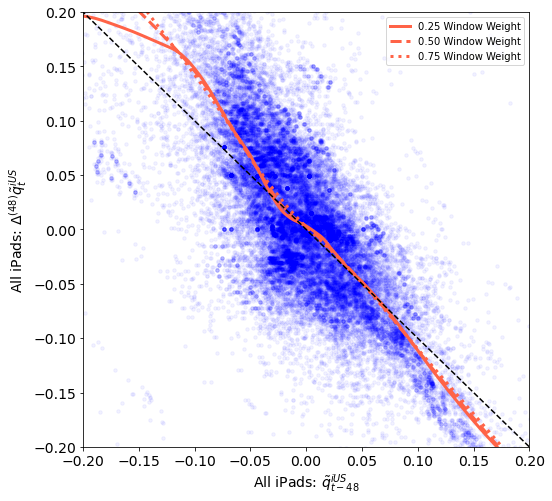

In [23]:
# Lowess options https://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html

for d in range(12,49,12):
    figname = r'figlowessalld'+str(d)+'.png'
    xall = []
    yall = []
    xallt = []
    yallt = []

    for product in ['qplUSadj','qpsUSadj','qipUSadj','qimUSadj']:
        x=dfbases.unstack(0).shift(d).stack(1).sort_values('Country')[product].tolist()
        y=dfbases.unstack(0).diff(periods=d).stack(1).sort_values('Country')[product]
        xall.append(x)
        yall.append(y)

    for i in range(0,4):
        for j in range(0,len(xall[i])):
            xallt.append(xall[i][j])
            yallt.append(yall[i][j])

    sm1_x, sm1_y = sm_lowess(yallt, xallt, frac=0.25, it=5, return_sorted = True).T
    sm2_x, sm2_y = sm_lowess(yallt, xallt, frac=0.50, it=5, return_sorted = True).T
    sm3_x, sm3_y = sm_lowess(yallt, xallt, frac=0.75, it=5, return_sorted = True).T

    plt.figure(figsize=(8,8))
    plt.plot(xallt, yallt, '.', color='blue', alpha=.05, ms=7, lw=1)
    plt.plot(sm1_x, sm1_y, '-', color='tomato', lw=3, label='0.25 Window Weight')
    plt.plot(sm2_x, sm2_y, '--', color='tomato', lw=3, label='0.50 Window Weight')
    plt.plot(sm3_x, sm3_y, ':', color='tomato', lw=3, label='0.75 Window Weight')
    plt.xlabel(r'All iPads: $\tilde{q}_{t-'+str(d)+'}^{iUS}$',size=14)
    plt.ylabel(r'All iPads: $\Delta^{('+str(d)+')}'+r'\tilde{q}_{t}^{iUS}$',size=14)
    plt.tick_params(labelsize=14)
    plt.plot([-0.3, 0.3], [0.3, -0.3], color='black', linestyle='dashed')
    plt.xlim(-0.2,0.2)
    plt.ylim(-0.2,0.2)
    plt.legend()
    plt.savefig(figname,transparent=True, bbox_inches='tight')

12
24
36
48


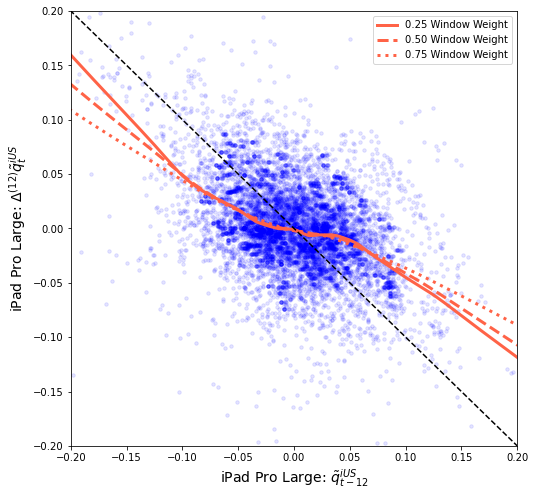

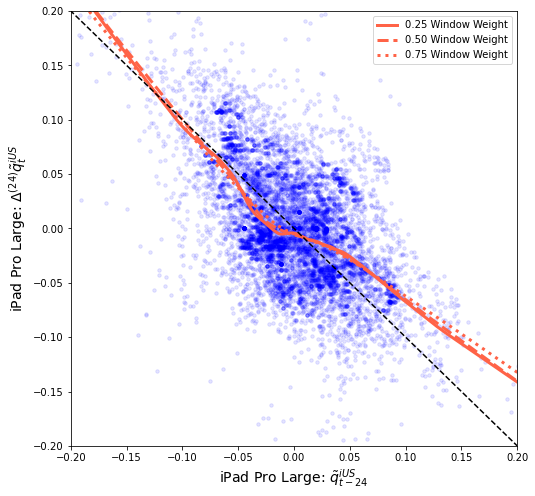

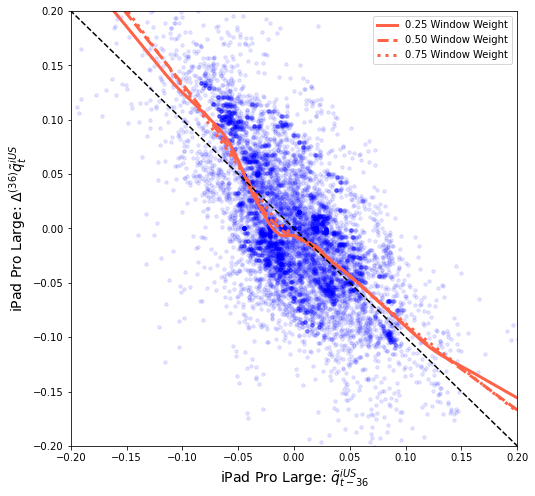

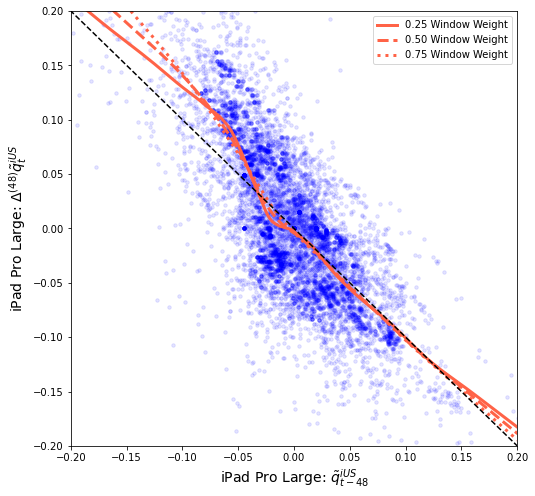

In [30]:
for d in range(12,49,12):
    print(d)

    figname = r'figlowessipadprold'+str(d)+'.png'
    
    x=dfbases.unstack(0).shift(d).stack(1).sort_values('Country')['qplUSadj']
    y=dfbases.unstack(0).diff(periods=d).stack(1).sort_values('Country')['qplUSadj']

    sm1_x, sm1_y = sm_lowess(y, x, frac=0.25, it=5, return_sorted = True).T
    sm2_x, sm2_y = sm_lowess(y, x, frac=0.50, it=5, return_sorted = True).T
    sm3_x, sm3_y = sm_lowess(y, x, frac=0.75, it=5, return_sorted = True).T

    plt.figure(figsize=(8,8))
    plt.plot(x, y, '.', color='blue', alpha=.1, ms=7, lw=1)
    plt.plot(sm1_x, sm1_y, '-', color='tomato', lw=3, label='0.25 Window Weight')
    plt.plot(sm2_x, sm2_y, '--', color='tomato', lw=3, label='0.50 Window Weight')
    plt.plot(sm3_x, sm3_y, ':', color='tomato', lw=3, label='0.75 Window Weight')
    plt.xlabel(r'iPad Pro Large: $\tilde{q}_{t-'+str(d)+'}^{iUS}$',size=14)
    plt.ylabel(r'iPad Pro Large: $\Delta^{('+str(d)+')}'+r'\tilde{q}_{t}^{iUS}$',size=14)
    plt.plot([-0.3, 0.3], [0.3, -0.3], color='black', linestyle='dashed')
    plt.xlim(-0.2,0.2)
    plt.ylim(-0.2,0.2)
    plt.legend()
    plt.savefig(figname,transparent=True, bbox_inches='tight')

12
24
36
48


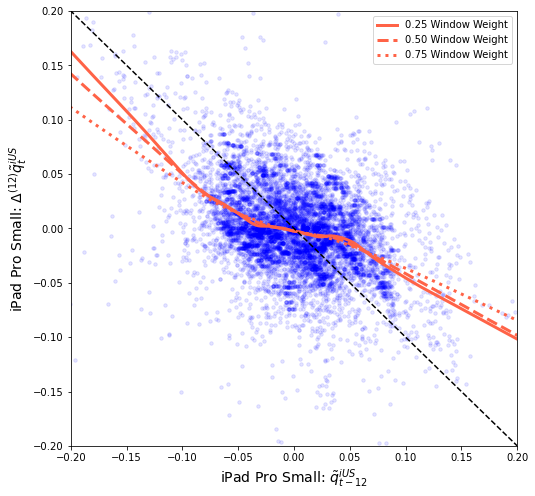

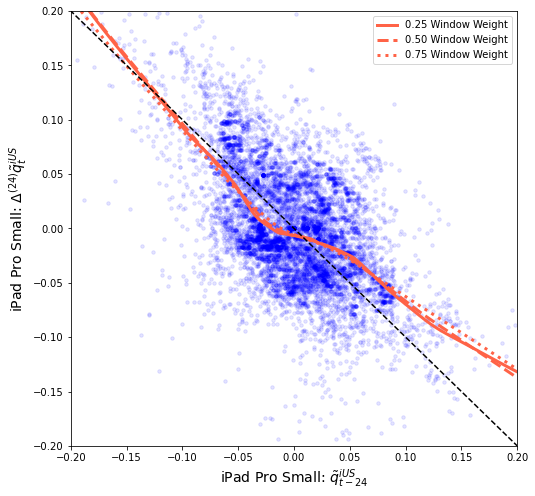

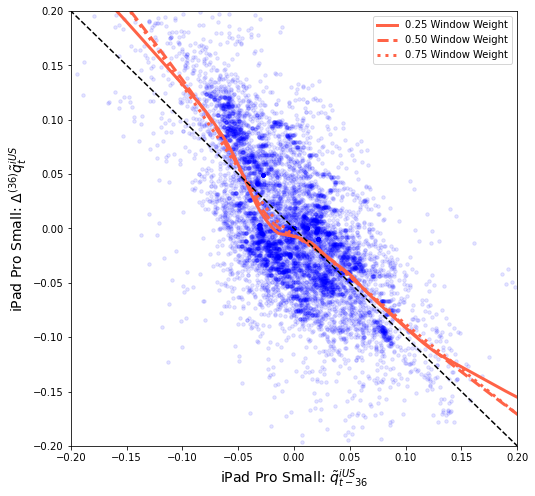

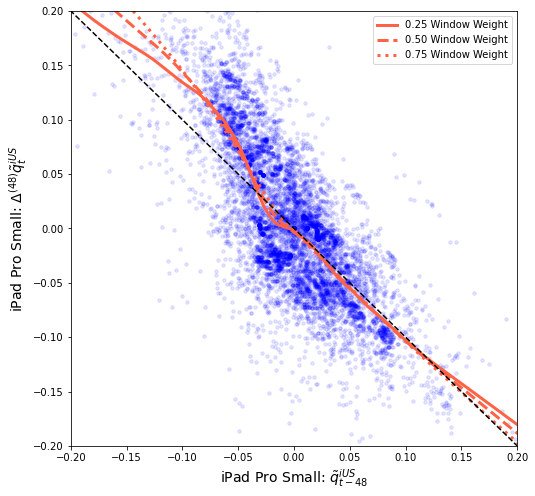

In [31]:
for d in range(12,49,12):
    print(d)

    figname = r'figlowessipadprosd'+str(d)+'.png'
    
    x=dfbases.unstack(0).shift(d).stack(1).sort_values('Country')['qpsUSadj']
    y=dfbases.unstack(0).diff(periods=d).stack(1).sort_values('Country')['qpsUSadj']

    from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
    import scipy.interpolate

    sm1_x, sm1_y = sm_lowess(y, x, frac=0.25, it=5, return_sorted = True).T
    sm2_x, sm2_y = sm_lowess(y, x, frac=0.50, it=5, return_sorted = True).T
    sm3_x, sm3_y = sm_lowess(y, x, frac=0.75, it=5, return_sorted = True).T

    plt.figure(figsize=(8,8))
    plt.plot(x, y, '.', color='blue', alpha=.1, ms=7, lw=1)
    plt.plot(sm1_x, sm1_y, '-', color='tomato', lw=3, label='0.25 Window Weight')
    plt.plot(sm2_x, sm2_y, '--', color='tomato', lw=3, label='0.50 Window Weight')
    plt.plot(sm3_x, sm3_y, ':', color='tomato', lw=3, label='0.75 Window Weight')
    plt.xlabel(r'iPad Pro Small: $\tilde{q}_{t-'+str(d)+'}^{iUS}$',size=14)
    plt.ylabel(r'iPad Pro Small: $\Delta^{('+str(d)+')}'+r'\tilde{q}_{t}^{iUS}$',size=14)
    plt.plot([-0.3, 0.3], [0.3, -0.3], color='black', linestyle='dashed')
    plt.xlim(-0.2,0.2)
    plt.ylim(-0.2,0.2)
    plt.legend()
    plt.savefig(figname,transparent=True, bbox_inches='tight')

12
24
36
48


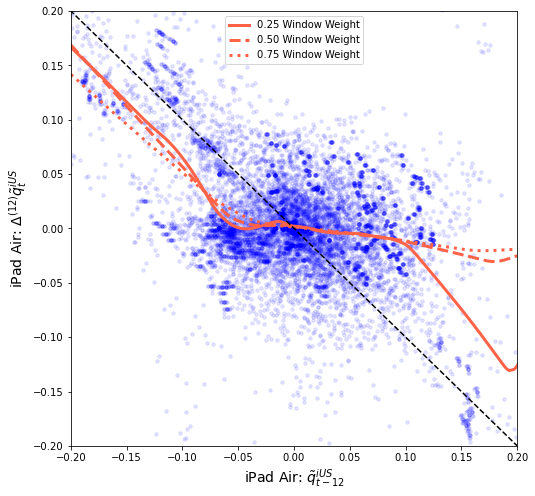

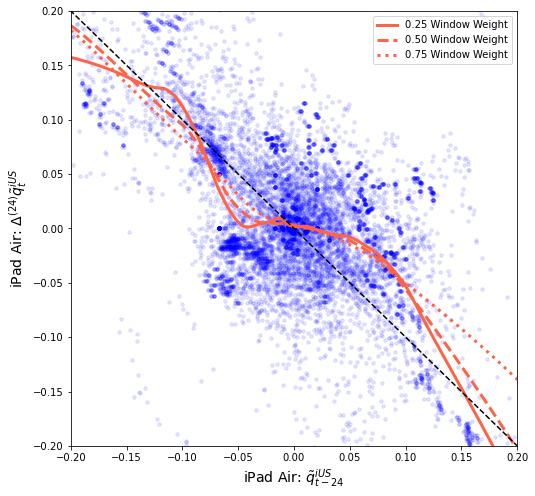

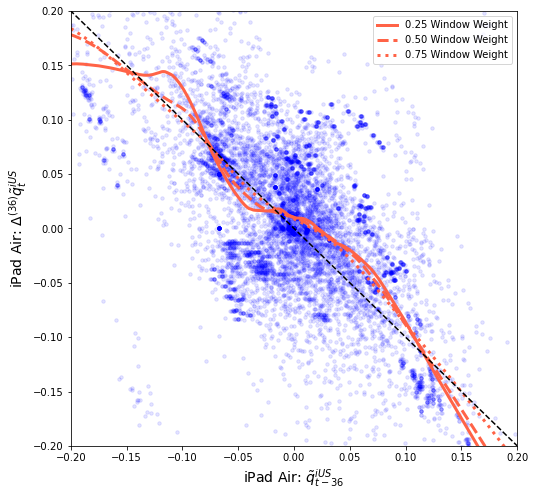

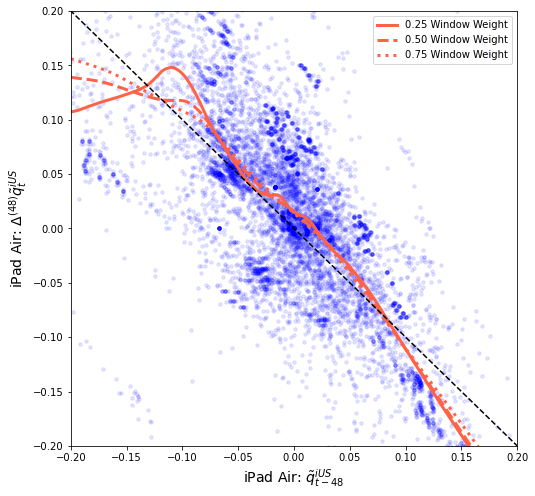

In [32]:
for d in range(12,49,12):
    print(d)

    figname = r'figlowessipadd'+str(d)+'.png'
    
    x=dfbases.unstack(0).shift(d).stack(1).sort_values('Country')['qipUSadj']
    y=dfbases.unstack(0).diff(periods=d).stack(1).sort_values('Country')['qipUSadj']

    from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
    import scipy.interpolate

    sm1_x, sm1_y = sm_lowess(y, x, frac=0.25, it=5, return_sorted = True).T
    sm2_x, sm2_y = sm_lowess(y, x, frac=0.50, it=5, return_sorted = True).T
    sm3_x, sm3_y = sm_lowess(y, x, frac=0.75, it=5, return_sorted = True).T

    plt.figure(figsize=(8,8))
    plt.plot(x, y, '.', color='blue', alpha=.1, ms=7, lw=1)
    plt.plot(sm1_x, sm1_y, '-', color='tomato', lw=3, label='0.25 Window Weight')
    plt.plot(sm2_x, sm2_y, '--', color='tomato', lw=3, label='0.50 Window Weight')
    plt.plot(sm3_x, sm3_y, ':', color='tomato', lw=3, label='0.75 Window Weight')
    plt.xlabel(r'iPad Air: $\tilde{q}_{t-'+str(d)+'}^{iUS}$',size=14)
    plt.ylabel(r'iPad Air: $\Delta^{('+str(d)+')}'+r'\tilde{q}_{t}^{iUS}$',size=14)
    plt.plot([-0.3, 0.3], [0.3, -0.3], color='black', linestyle='dashed')
    plt.xlim(-0.2,0.2)
    plt.ylim(-0.2,0.2)
    plt.legend()
    plt.savefig(figname,transparent=True, bbox_inches='tight')

12
24
36
48


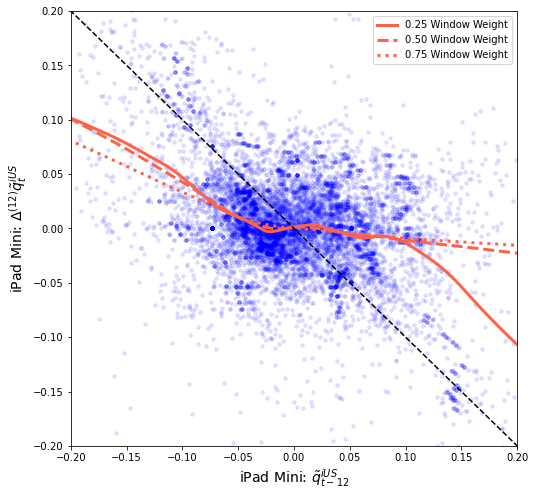

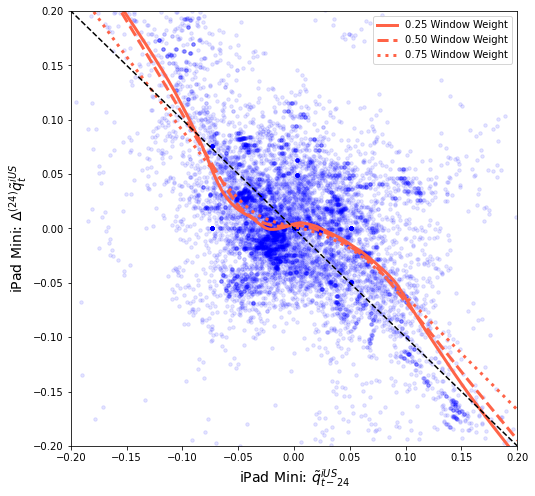

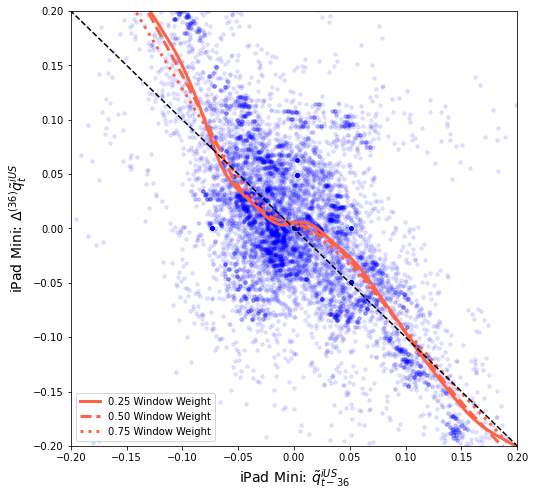

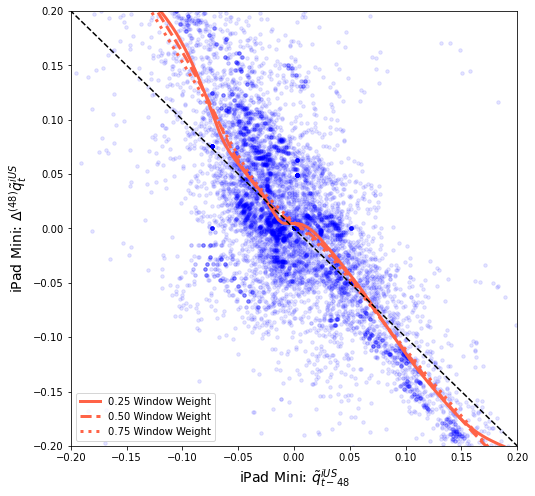

In [33]:
for d in range(12,49,12):
    print(d)

    figname = r'figlowessipadminid'+str(d)+'.png'
    
    x=dfbases.unstack(0).shift(d).stack(1).sort_values('Country')['qimUSadj']
    y=dfbases.unstack(0).diff(periods=d).stack(1).sort_values('Country')['qimUSadj']

    from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
    import scipy.interpolate

    sm1_x, sm1_y = sm_lowess(y, x, frac=0.25, it=5, return_sorted = True).T
    sm2_x, sm2_y = sm_lowess(y, x, frac=0.50, it=5, return_sorted = True).T
    sm3_x, sm3_y = sm_lowess(y, x, frac=0.75, it=5, return_sorted = True).T

    plt.figure(figsize=(8,8))
    plt.plot(x, y, '.', color='blue', alpha=.1, ms=7, lw=1)
    plt.plot(sm1_x, sm1_y, '-', color='tomato', lw=3, label='0.25 Window Weight')
    plt.plot(sm2_x, sm2_y, '--', color='tomato', lw=3, label='0.50 Window Weight')
    plt.plot(sm3_x, sm3_y, ':', color='tomato', lw=3, label='0.75 Window Weight')
    plt.xlabel(r'iPad Mini: $\tilde{q}_{t-'+str(d)+'}^{iUS}$',size=14)
    plt.ylabel(r'iPad Mini: $\Delta^{('+str(d)+')}'+r'\tilde{q}_{t}^{iUS}$',size=14)
    plt.plot([-0.3, 0.3], [0.3, -0.3], color='black', linestyle='dashed')
    plt.xlim(-0.2,0.2)
    plt.ylim(-0.2,0.2)
    plt.legend()
    plt.savefig(figname,transparent=True, bbox_inches='tight')